In [1]:
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 101] Network is
[nltk_data]     unreachable>


False

In [102]:
# load the text file in utf-8 encoding
with open('data/language-never-random.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# print the first 1000 characters
print(text[:1000])


                       Language is never, ever, ever, random

                                                               ADAM KILGARRIFF




Abstract
Language users never choose words randomly, and language is essentially
non-random. Statistical hypothesis testing uses a null hypothesis, which
posits randomness. Hence, when we look at linguistic phenomena in cor-
pora, the null hypothesis will never be true. Moreover, where there is enough
data, we shall (almost) always be able to establish that it is not true. In
corpus studies, we frequently do have enough data, so the fact that a rela-
tion between two phenomena is demonstrably non-random, does not sup-
port the inference that it is not arbitrary. We present experimental evidence
of how arbitrary associations between word frequencies and corpora are
systematically non-random. We review literature in which hypothesis test-
ing has been used, and show how it has often led to unhelpful or mislead-
ing results.
Keywords: 쎲쎲쎲

1. Int

In [103]:
# write functions to clean text and normalize text
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# convert to lower case
def to_lower(text):
    return text.lower()

# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# remove trailing and leading spaces
def remove_spaces(text):
    return text.strip()

# chain all the functions together
def normalize(text):
    text = to_lower(text)
    # text = remove_punctuation(text)
    return text

# normalize the text
text = normalize(text)

# print the first 1000 characters
print(text[:1000])

                       language is never, ever, ever, random

                                                               adam kilgarriff




abstract
language users never choose words randomly, and language is essentially
non-random. statistical hypothesis testing uses a null hypothesis, which
posits randomness. hence, when we look at linguistic phenomena in cor-
pora, the null hypothesis will never be true. moreover, where there is enough
data, we shall (almost) always be able to establish that it is not true. in
corpus studies, we frequently do have enough data, so the fact that a rela-
tion between two phenomena is demonstrably non-random, does not sup-
port the inference that it is not arbitrary. we present experimental evidence
of how arbitrary associations between word frequencies and corpora are
systematically non-random. we review literature in which hypothesis test-
ing has been used, and show how it has often led to unhelpful or mislead-
ing results.
keywords: 쎲쎲쎲

1. int

In [104]:
from nltk.util import pad_sequence, bigrams, trigrams, ngrams
from nltk.lm.preprocessing import pad_both_ends, flatten, padded_everygram_pipeline
# list(pad_sequence(reviews[0], pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>', n=3))
# list(pad_both_ends(reviews[0], n=3))

In [105]:
# split the text into sentences
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)
# print the first 5 sentences
print(sentences[0])
# tokenize the first sentences
# randomly split the sentences into train and test dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(sentences, test_size=0.2, random_state=42)

# print the number of sentences in train and test dataset
print('train dataset length: ', len(train))
print('test dataset length: ', len(test))

# create a function to tokenize the sentences
def tokenize_sentences(sentences):
    tokenized_sentences = []
    for sentence in sentences:
        tokenized = nltk.word_tokenize(sentence)
        tokenized_sentences.append(tokenized)
    return tokenized_sentences

# tokenize sentences in train and test dataset
tokenized_train = tokenize_sentences(train)
tokenized_test = tokenize_sentences(test)


# print the first tokenized sentence in train dataset
print(tokenized_train[0])

# print the first tokenized sentence in test dataset
print(tokenized_test[0])


                       language is never, ever, ever, random

                                                               adam kilgarriff




abstract
language users never choose words randomly, and language is essentially
non-random.
train dataset length:  172
test dataset length:  43
['as', 'table', '4', 'shows', ',', 'average', 'values', 'for', 'the', 'error', 'term', 'are', 'far', 'greater', 'than', '0.5', ',', 'and', 'tend', 'to', 'increase', 'as', 'word', 'frequency', 'increases', '.']
['harlow', ':', 'longman', '.']


In [167]:
from nltk.lm import MLE, Laplace, KneserNeyInterpolated

## Creating the Unigram Model

In [189]:
n = 1

train_unigram , train_unigram_padded_sents = padded_everygram_pipeline(n, tokenized_train)
test_unigram , _= padded_everygram_pipeline(n, tokenized_test)

In [190]:
unigram_model = Laplace(order = n)
unigram_model.fit(train_unigram, train_unigram_padded_sents)

In [191]:
import math
total_perplexity = 0
count = 0
test_unigram, _ = padded_everygram_pipeline(n, tokenized_test)
for sent in test_unigram:
    # calculate the perplexity for each sentence
    # print(sent)
    # perplexity takes a sequence of n-gram tuples as argument
    # we need to convert the sentence to n-gram tuples
    # we use pad_both_ends function to add padding to the sentence
    # we use bigrams function to convert the sentence to bigram tuples
    # we use list function to convert the generator object to list
    perplexity = unigram_model.perplexity(sent)
    if perplexity == math.inf:
        continue
    total_perplexity += perplexity
    count += 1
ave_perplexity = total_perplexity / count
print('Average Perplexity: ', ave_perplexity)
print('Count of positive perplexity: ', count)

unigram_perplexity = ave_perplexity

Average Perplexity:  512.8440632701563
Count of positive perplexity:  43


## Creating Bigram Model

In [192]:
n = 2

train_bigram , train_bigram_padded_sents = padded_everygram_pipeline(n, tokenized_train)
test_bigram , test_bigram_padded_sents = padded_everygram_pipeline(n, tokenized_test)

# train_reviews_bigram initialises a generator object
# each element of the generator object is again a generator object
# each element of the inner generator object is a list of tuple of n-grams upto n=2

# train_padded_sents initialises a generator object
# each element of train padded sents is a list of tekens with padding at both ends based on the n value
# if n = 1 no pad token is added
# if n = 2 one pad tokens are added at both ends e.g. <s> big brown cow </s>
# if n = 3 two pad tokens are added at both ends e.g. <s> <s> big brown cow </s> </s>
# and so on ...

In [193]:
bigram_model = Laplace(order=n)
bigram_model.fit(train_bigram, train_bigram_padded_sents)

In [194]:
print(bigram_model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 1177 items>


In [195]:
import math
total_perplexity = 0
count = 0
test_bigram, _ = padded_everygram_pipeline(n, tokenized_test)
for sent in test_bigram:
    # calculate the perplexity for each sentence
    # print(sent)
    # perplexity takes a sequence of n-gram tuples as argument
    # we need to convert the sentence to n-gram tuples
    # we use pad_both_ends function to add padding to the sentence
    # we use bigrams function to convert the sentence to bigram tuples
    # we use list function to convert the generator object to list
    perplexity = bigram_model.perplexity(sent)
    if perplexity == math.inf:
        continue
    total_perplexity += perplexity
    count += 1
ave_perplexity = total_perplexity / count
print('Average Perplexity: ', ave_perplexity)
print('Count of positive perplexity: ', count)

bigram_perplexity = ave_perplexity

Average Perplexity:  496.22276680695205
Count of positive perplexity:  43


In [61]:
x = list(test_bigram_padded_sents)

## Create Trigram Model

In [196]:
n = 3
train_trigram, train_padded_sent = padded_everygram_pipeline(n, tokenized_train)
test_trigram, _ = padded_everygram_pipeline(n, tokenized_test)

In [197]:
trigram_model = Laplace(order = n)
trigram_model.fit(train_trigram, train_padded_sent)

In [198]:
print(trigram_model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 1177 items>


In [199]:
import math
total_perplexity = 0
count = 0
test_trigram, _ = padded_everygram_pipeline(n, tokenized_test)
for sent in test_trigram:
    # calculate the perplexity for each sentence
    # print(sent)
    # perplexity takes a sequence of n-gram tuples as argument
    perplexity = trigram_model.perplexity(sent)
    if perplexity == math.inf:
        continue
    total_perplexity += perplexity
    count += 1
    print(list(sent))
    break
ave_perplexity = total_perplexity / count
print('Average Perplexity: ', ave_perplexity)
print('Count of positive perplexity: ', count)

trigram_perplexity = ave_perplexity

[]
Average Perplexity:  188.690828262962
Count of positive perplexity:  1


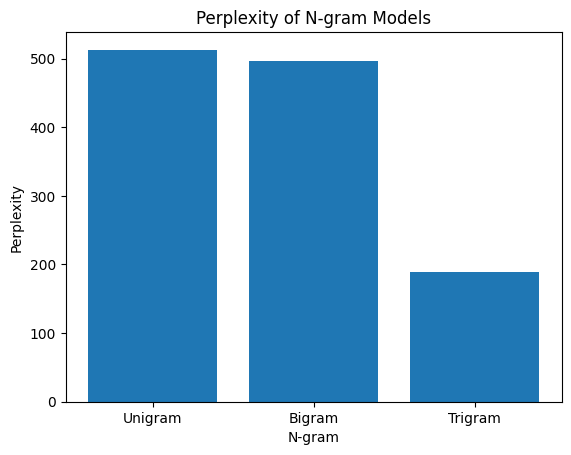

In [201]:
import matplotlib.pyplot as plt

x = ['Unigram', 'Bigram', 'Trigram']
y = [unigram_perplexity, bigram_perplexity, trigram_perplexity]
plt.bar(x, y)
plt.xlabel('N-gram')
plt.ylabel('Perplexity')
plt.title('Perplexity of N-gram Models')
plt.show()